In [2]:
import numpy as np
import tensorflow as tf
import cv2
from google.cloud import storage
import io
from PIL import Image
from image_gen import ImageCollector

In [3]:
client = storage.Client()
# https://console.cloud.google.com/storage/browser/[bucket-id]/
bucket = client.get_bucket('inpainting-final-project')

In [4]:
bucket

<Bucket: inpainting-final-project>

In [5]:
blobs = bucket.list_blobs(prefix='images/Cars/cars_train/')
images = [] 

try:
    for blob in blobs:
        blob = bucket.get_blob(blob.name)
        s = blob.download_as_string()
        img = Image.open(io.BytesIO(s))
        
        #resize the image to (64,64,3) and normalize it to between -1 and 1
        resized_img = cv2.resize(np.asarray(img),(64,64))/127.5-1.0
        
        if resized_img.shape == (64,64,3):
            images.append(resized_img)
except:
    pass
 

In [6]:
#check the number of images 
len(images)

8126

In [7]:
#show an example image matrix 
images[0]

array([[[-0.34117647, -0.2       , -0.16862745],
        [-0.2627451 , -0.12156863, -0.09019608],
        [-0.45098039, -0.27843137, -0.23921569],
        ...,
        [ 0.9372549 ,  0.96862745,  0.97647059],
        [ 0.97647059,  1.        ,  1.        ],
        [ 0.9372549 ,  0.98431373,  0.98431373]],

       [[-0.34117647, -0.2       , -0.16862745],
        [-0.23137255, -0.09019608, -0.05882353],
        [-0.30196078, -0.15294118, -0.10588235],
        ...,
        [ 0.91372549,  0.98431373,  0.97647059],
        [ 0.90588235,  0.97647059,  0.96862745],
        [ 0.89803922,  0.94509804,  0.94509804]],

       [[-0.27843137, -0.1372549 , -0.11372549],
        [-0.35686275, -0.21568627, -0.18431373],
        [-0.31764706, -0.18431373, -0.1372549 ],
        ...,
        [ 0.89803922,  0.96862745,  0.96862745],
        [ 0.8745098 ,  0.95294118,  0.94509804],
        [ 0.90588235,  0.95294118,  0.95294118]],

       ...,

       [[ 0.35686275,  0.37254902,  0.28627451],
        [ 0

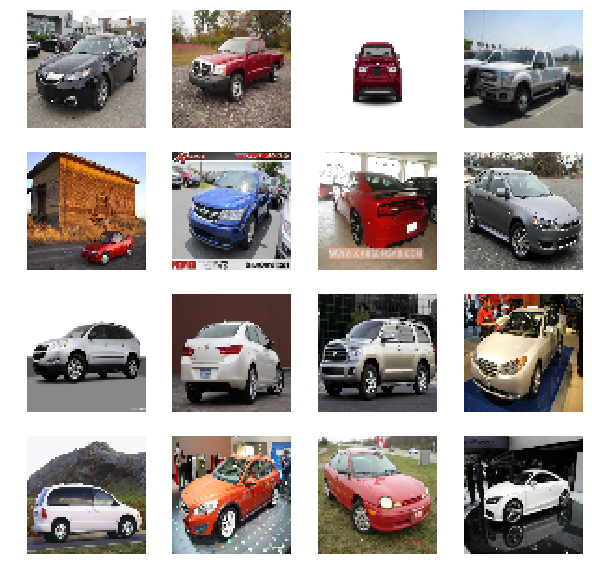

In [35]:
#visualize the preprocessed images

#convert the images back to 0-255 for visualization 

images2 = [cv2.normalize(i, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F).astype(np.uint8) for i in images]
img_col = ImageCollector(np.asarray(images2))
img_col.show(np.asarray(images2))

In [2]:
#train the model - generator and discriminator 
from dcgan_model import DCGAN

tf.reset_default_graph()
dcgan = DCGAN()
dcgan.train(np.asarray(images), iters = 1000)

In [37]:
# show the graph
from cnn_jupyter_tensorboard import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./checkpoints/DCGAN.ckpt.meta')
    graph = tf.get_default_graph()
    show_graph(graph)
    

In [38]:
tf.train.get_checkpoint_state('checkpoints')

model_checkpoint_path: "checkpoints/DCGAN.ckpt"
all_model_checkpoint_paths: "checkpoints/DCGAN.ckpt"

In [39]:
checkpoint = tf.train.latest_checkpoint('checkpoints')

In [40]:
#Step 1 
#import the model metagraph
saver = tf.train.import_meta_graph('./checkpoints/DCGAN.ckpt.meta', clear_devices=True)
#make that as the default graph
graph = tf.get_default_graph()
input_graph_def = graph.as_graph_def()
sess = tf.Session()
#now restore the variables
saver.restore(sess, "./checkpoints/DCGAN.ckpt")


INFO:tensorflow:Restoring parameters from ./checkpoints/DCGAN.ckpt


In [41]:
#Step 2
# Find the output name
graph = tf.get_default_graph()
for n in graph.as_graph_def().node: 
      print (n.name)

save/RestoreV2/shape_and_slices
save/RestoreV2/tensor_names
save/SaveV2/shape_and_slices
save/SaveV2/tensor_names
save/Const
save/RestoreV2
train_step_1/d_adam/epsilon
train_step_1/d_adam/beta2
train_step_1/d_adam/beta1
train_step_1/d_adam/learning_rate
fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1
save/Assign_67
fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1/read
fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1/Initializer/zeros
fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1/Assign
fc_layer_d/fc_bias/d_fc_bias_1/d_adam
save/Assign_66
fc_layer_d/fc_bias/d_fc_bias_1/d_adam/read
fc_layer_d/fc_bias/d_fc_bias_1/d_adam/Initializer/zeros
fc_layer_d/fc_bias/d_fc_bias_1/d_adam/Assign
fc_layer_d/d_fc_kernel_1/d_adam_1
save/Assign_64
fc_layer_d/d_fc_kernel_1/d_adam_1/read
fc_layer_d/d_fc_kernel_1/d_adam_1/Initializer/zeros/Const
fc_layer_d/d_fc_kernel_1/d_adam_1/Initializer/zeros/shape_as_tensor
fc_layer_d/d_fc_kernel_1/d_adam_1/Initializer/zeros
fc_layer_d/d_fc_kernel_1/d_adam_1/Assign
fc_layer_d/d_fc_kernel_1/d_adam
save/

train_step/gradients/logistic_loss_2/Log1p_grad/Reciprocal
train_step/gradients/logistic_loss_2/Log1p_grad/mul
train_step/gradients/logistic_loss_2/Exp_grad/mul
train_step/gradients/logistic_loss_2/Select_1_grad/Select_1
train_step/gradients/logistic_loss_2/Select_1_grad/Select
train_step/gradients/logistic_loss_2/Select_1_grad/tuple/group_deps
train_step/gradients/logistic_loss_2/Select_1_grad/tuple/control_dependency_1
train_step/gradients/logistic_loss_2/Select_1_grad/tuple/control_dependency
train_step/gradients/logistic_loss_2/Neg_grad/Neg
train_step/gradients/AddN
train_step/gradients/fc_layer_d_1/Add_grad/Sum_1
train_step/gradients/fc_layer_d_1/Add_grad/Reshape_1
train_step/gradients/fc_layer_d_1/Add_grad/Sum
train_step/gradients/fc_layer_d_1/Add_grad/Reshape
train_step/gradients/fc_layer_d_1/Add_grad/tuple/group_deps
train_step/gradients/fc_layer_d_1/Add_grad/tuple/control_dependency_1
train_step/gradients/fc_layer_d_1/Add_grad/tuple/control_dependency
train_step/gradients/fc_l

Generator/batch_norm_2/cond/switch_f_1
Generator/batch_norm_2/cond/switch_t_1
Generator/batch_norm_2/cond/ExponentialMovingAverage/AssignMovingAvg_1/sub/x_1
Generator/batch_norm_2/cond/ExponentialMovingAverage/AssignMovingAvg/sub/x_1
Generator/batch_norm_2/cond/ExponentialMovingAverage/decay_1
Generator/batch_norm_2/cond/ExponentialMovingAverage/AssignMovingAvg_1/sub_2
Generator/batch_norm_2/cond/ExponentialMovingAverage/AssignMovingAvg/sub_2
Generator/batch_norm_1/cond/pred_id_1
Generator/batch_norm_1/cond/Switch_2_1
Generator/batch_norm_1/cond/Switch_1_1
Generator/batch_norm_1/cond/ExponentialMovingAverage/AssignMovingAvg_1/Switch_1
Generator/batch_norm_1/cond/ExponentialMovingAverage/AssignMovingAvg_1/sub_1/Switch_2
Generator/batch_norm_1/cond/ExponentialMovingAverage/AssignMovingAvg/Switch_1
Generator/batch_norm_1/cond/ExponentialMovingAverage/AssignMovingAvg/sub_1/Switch_2
Generator/batch_norm_1/cond/Switch_3
Generator/batch_norm_1/cond/switch_f_1
Generator/batch_norm_1/cond/switc

In [44]:
#Step 3
from tensorflow.python.platform import gfile
from tensorflow.python.framework import graph_util

output_node_names=[v.op.name for v in tf.global_variables()] 

output_graph_def = graph_util.convert_variables_to_constants(
        sess, # The session
        input_graph_def, # input_graph_def is useful for retrieving the nodes 
        output_node_names)    



INFO:tensorflow:Froze 72 variables.
Converted 72 variables to const ops.


In [45]:
#Step 4
#output folder
output_fld ='./'
#output pb file name
output_model_file = 'model.pb'
from tensorflow.python.framework import graph_io
#write the graph
graph_io.write_graph(output_graph_def, output_fld, output_model_file, as_text=False)

'./model.pb'

In [46]:
def loadpb(filename, model_name='dcgan'):
        """Loads pretrained graph from ProtoBuf file
        Arguments:
            filename - path to ProtoBuf graph definition
            model_name - prefix to assign to loaded graph node names
        Returns:
            graph, graph_def - as per Tensorflow definitions
        """
        with tf.gfile.GFile(filename, 'rb') as f:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(f.read())

        with tf.Graph().as_default() as graph:
            tf.import_graph_def(graph_def,
                                input_map=None,
                                return_elements=None,
                                op_dict=None,
                                producer_op_list=None,
                                name=model_name)

        return graph, graph_def

In [47]:
loadpb('./model.pb',model_name='DCGAN' )

Instructions for updating:
Please file an issue at https://github.com/tensorflow/tensorflow/issues if you depend on this feature.


In [18]:
def add_noise(x, portion, amplitude):
        """
        Add random integer noise to self.x.
        :param portion: The portion of self.x samples to inject noise. If x contains 10000 sample and portion = 0.1,
                        then 1000 samples will be noise-injected.
        :param amplitude: An integer scaling factor of the noise.
        :return added: dataset with noise added
        """
        # TODO: Implement the add_noise function. Remember to record the
        # boolean value is_add_noise. You can try uniform noise or Gaussian
        # noise or others ones that you think appropriate.
        # raise NotImplementedError

        channels = 3
        num_of_samples = len(x)

        for i in range(num_of_samples):
            #in each sample, we need to shift for each channel
            random_boolean = np.random.choice(a=[True, False], size=1, p=[portion, 1-portion])

            if random_boolean == True:
                
                for j in range(channels):

                    mean = 0
                    std = 0.01
                    noise = amplitude * np.random.normal(mean, std, x[i,:,:,j].shape)
                    print(noise)
                    x[i,:,:,j] += noise

        return x 
